# **House Sales in King County, USA**

# **Introduction**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

## Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib
import tensorflow as tf

# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"Tensorflow version : Tensorflow {tf.__version__}")

#Magic function to display In-Notebook display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='deep')

Numpy version : Numpy 1.18.1
Pandas version : Pandas 1.0.3
Matplotlib version : Matplotlib 3.2.1
Seaborn version : Seaborn 0.10.0
Tensorflow version : Tensorflow 2.2.0


## Import the Dataset

In [2]:
# df = pd.read_csv("kc_house_data.csv", encoding = 'latin-1')
df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [3]:
df.head(8).T

,0,1,2,3,4,5,6,7
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850
bedrooms,3,3,2,4,3,4,3,3
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5
sqft_living,1180,2570,770,1960,1680,5420,1715,1060
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711
floors,1,2,1,1,1,1,2,1
waterfront,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0


# **Exploratory Data Analysis**

Once the data is read into python, we need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few colums or rows, joining some other data, and handling qualitative variables like dates.

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Checking concise summary of dataset

It is also a good practice to know the features and their corresponding data types,along with finding whether they contain null values or not.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

* Data has float, integer, and object type values.
* Data type of timeStamp is object that need to conver to datetime.

## Generate descriptive statistics

Lets summarize the central tendency, dispersion and shape of a dataset's distribution.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Categorical vs Continuous Features

In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

**Below are the category of the features:**

1. Qualitative Features:
    * date - Qualitative Features

2. Categorical Features:
    * floors - Categorical Nominal feature
    * waterfront - Categorical Nominal feature
    * view - Categorical Ordinal feature
    * condition - Categorical Ordinal feature
    * grade - Categorical Ordinal feature
    * bedrooms - Categorical Nominal feature
    * bathrooms - Categorical Nominal feature
    
3. Quantitative Features:
    * Rest all are Quantitative Features.

### Finding null values

In [8]:
# Dealing with missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values present in the dataset. It is not necessary that missing values are present in the dataset in the form of  NA, NAN, Zeroes etc, it may be present by some other values that can be explored by analysising the each features.

### Removing Duplicate rows

In [9]:
df.shape

(21613, 21)

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(21613, 21)

There was no duplicate data in this dataset.

### Observe the distribution of target variable - Price

If target variable's distribution is too skewed then the predictive modeling will not be possible. Bell curve is desirable but slightly positive skew or negative skew is also fine.

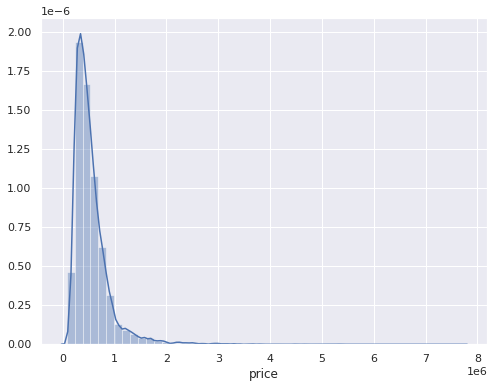

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(df['price'])
plt.show()

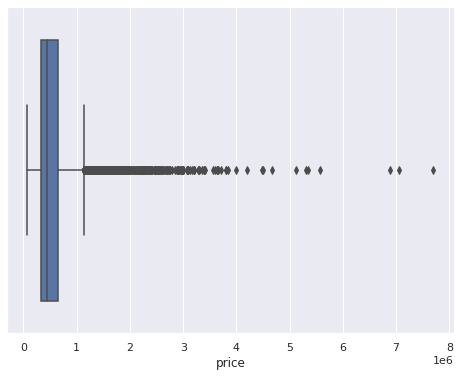

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(df['price'])
plt.show()

Most the property prices falls between 0 and around $ 1.5 million and we have some outliers for really expensive houses and it may actually make sense to drop those outliers in our analysis if they are just a few
points that are very extreme.

So we can essentially build a model that realistically predicts the price of a house if its intended value is somewhere between let's say 0 and 2 million dollars.

There's not going to be that many houses apparently on the market that are worth more than let's say 3 million. So that's something to keep in mind here especially for applying this to a realistic situation when trying to build a model for a real estate agency since it's really not that many houses on the market that are that expensive. It may not be really useful to actually have our model train on these extreme outliers.

In [14]:
# Create a function to return the outliers
def detect_outliers(x, c = 1.5):
    q1, q3 = np.percentile(x, [25,75])
    #print("q1 - ",q1, " q3 - ", q3)
    
    iqr = (q3 - q1)
    #print("iqr --", iqr)
    
    lob = q1 - (iqr * c)
    #print("lob - ",lob)
    
    uob = q3 + (iqr * c)
    #print("uob - ",uob)
    
    # Generate outliers
    indicies = np.where((x > uob) | (x < lob))

    return indicies

In [15]:
# Detect all Outliers 
priceOutliers = detect_outliers(df['price'])
print("Total Outliers count : ",len(priceOutliers[0]))

Total Outliers count :  1146


In [16]:
df.shape

(21613, 21)

In [17]:
# Remove outliers
df = df.drop(priceOutliers[0])

In [18]:
df.shape

(20467, 21)

## Correlation Among Explanatory Variables

Having **too many features** in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, **if a feature does not improve your model a lot, not adding it may be a better choice.**

Another important thing is **correlation. If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting.** For instance, if there is overfitting, we may remove sqt_above or sqt_living because they are highly correlated. This relation can be estimated when we look at the definitions in the dataset but to be sure the correlation matrix should be checked. However, this does not mean that you must remove one of the highly correlated features. For example bathrooms and sqrt_living. They are highly correlated but I do not think that the relation between them is the same as the relation between sqt_living and sqt_above.

Lets find out top 10 features which are highly correlaed with price.

In [19]:
df.corr()['price'].sort_values(ascending=False).head(10)

price            1.000000
grade            0.631182
sqft_living      0.622333
sqft_living15    0.562090
sqft_above       0.530451
bathrooms        0.455927
lat              0.430762
bedrooms         0.296956
floors           0.273987
view             0.238268
Name: price, dtype: float64

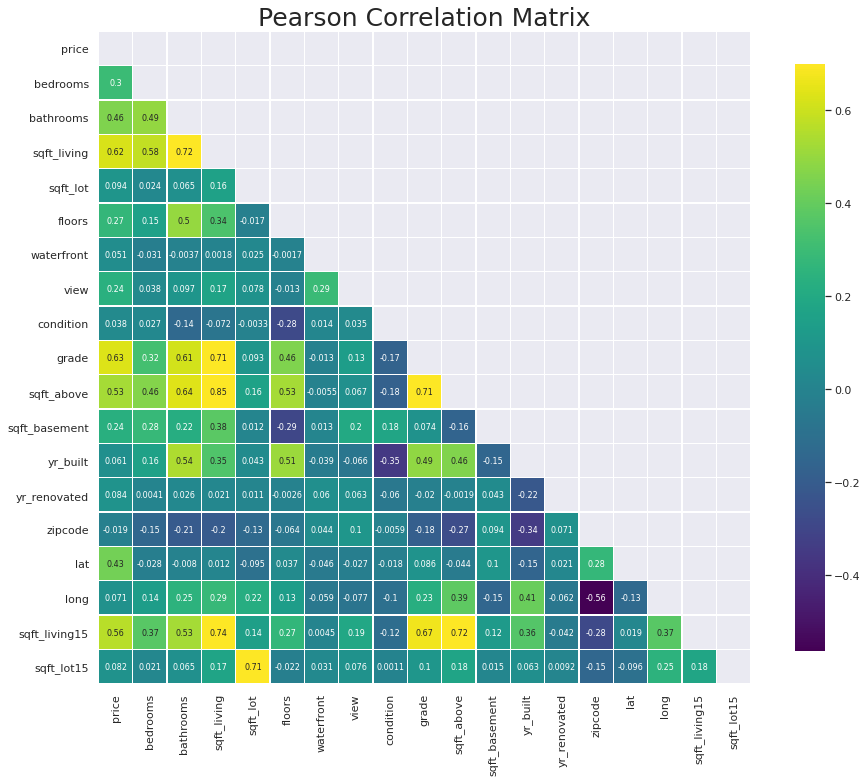

In [20]:
features = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="viridis",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

plt.show()

So the feature like sqft_living, grade, sqft_above, sqft_living15 , bathrooms, view , sqft_basement, bedrooms, lat are hightly correlated with lable price. So lets explore the highly correlated features with label Price.

In [21]:
df.corr()['sqft_living'].sort_values(ascending=False).head(10)

sqft_living      1.000000
sqft_above       0.853561
sqft_living15    0.738190
bathrooms        0.716684
grade            0.705620
price            0.622333
bedrooms         0.584609
sqft_basement    0.376601
yr_built         0.353754
floors           0.340731
Name: sqft_living, dtype: float64

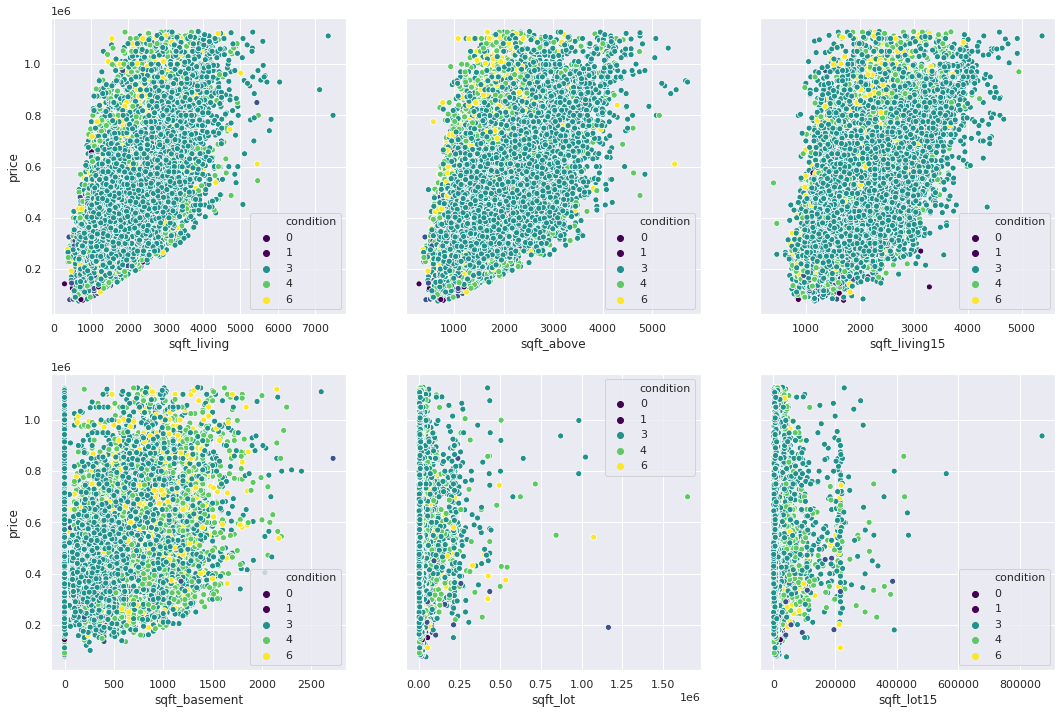

In [22]:
fig, axs = plt.subplots( nrows=2, ncols=3, sharey=True, figsize=(18,12))

sns.scatterplot(y='price',x='sqft_living',data=df, hue='condition', palette='viridis', ax=axs[0,0])
sns.scatterplot(y='price',x='sqft_above',data=df, hue='condition', palette='viridis', ax=axs[0,1])
sns.scatterplot(y='price',x='sqft_living15',data=df, hue='condition', palette='viridis', ax=axs[0,2])

sns.scatterplot(y='price',x='sqft_basement',data=df, hue='condition', palette='viridis', ax=axs[1,0])
sns.scatterplot(y='price',x='sqft_lot',data=df, hue='condition', palette='viridis', ax=axs[1,1])
sns.scatterplot(y='price',x='sqft_lot15',data=df, hue='condition', palette='viridis', ax=axs[1,2])


plt.show()

It seems there is strong positive correlation of sqft_living, sqft_above and sqft_living15 with price. However it is not the case with sqft_basement, sqft_lot, sqft_lot15. It is quite obvious that bigger houses are costiler. Graphs also shows that most of the houses do not have basement and land space, although price is not linearily increasing with bigger basement and land space. I found that the feature sqft_living is sum of sqft_above and sqft_basement. 

sqft_living = sqft_above + sqft_basement

#### View of property vs property price

[]

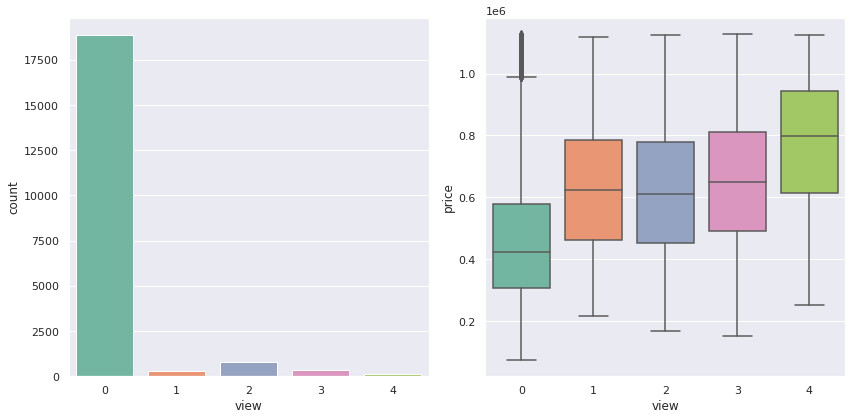

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='view',data=df, palette='Set2', ax=axs[0])
sns.boxplot(y='price',x='view',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.plot()

View ranges from 0 to 4 and it shows how good the view of the property was. Above plots graph shows that majority of houses do have good view and that's why their price range is also very less. Few houses have view index of 4 and they are actually expensive.

#### Grade of property vs property price

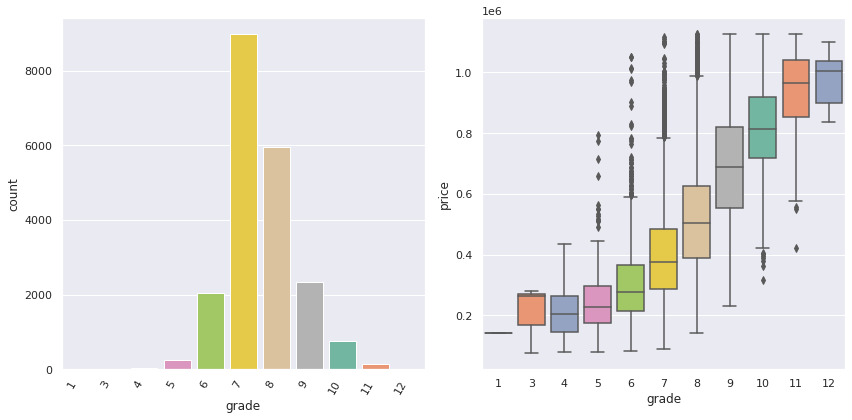

In [24]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

ax = sns.countplot(x='grade',data=df, palette='Set2', ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
sns.boxplot(y='price',x='grade',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

Most of the houses have average level of contrcution and design. And as the construction and design quality increases, as their prices. It actually make sense that good quality of construction and design have higher prices.

#### Condition of property vs property price

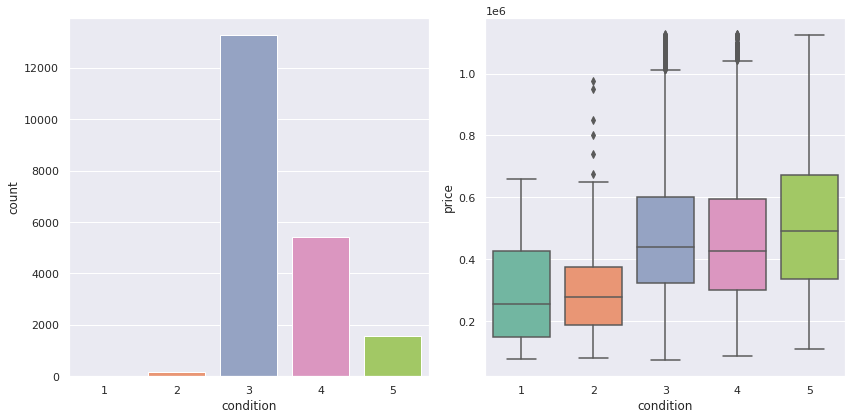

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='condition',data=df, palette='Set2', ax=axs[0])
sns.boxplot(y='price',x='condition',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

condition - An index from 1 to 5 on the condition of the apartment.

Majority of houses have average condition, however there prices is not very less in comparision to good condition of houses. 

#### Waterfront of property vs property price

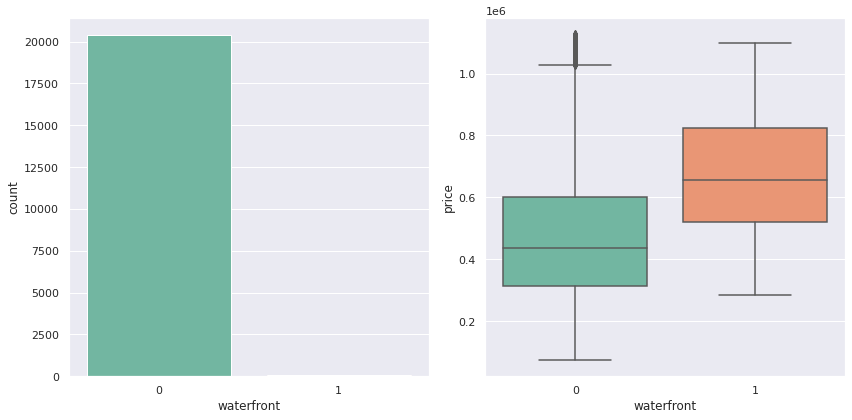

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='waterfront',data=df, palette='Set2', ax=axs[0])
sns.boxplot(y='price',x='waterfront',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not.

It is quite obvious that properties facing water bodies are always quite expensive, however they are only few in numbers.

#### No of Bedroom of property vs property price

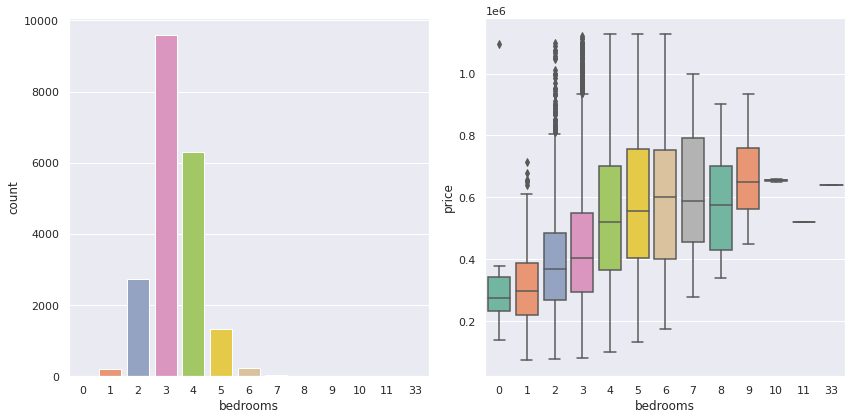

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='bedrooms',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='bedrooms',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

Vast majority of all these houses have somewhere between two to five bedrooms and it looks like there's a huge mansion that has 33 bedrooms. But we can't actually see that bar because number of rest of the bedrooms are in the thousands and this is as small as one.

Other graph is showing the distribution of prices per bedrooms. There's quite a bit of variation in bedrooms ranging between 3 and 7. And that also makes sense because if we took a look at our count plot it looks like the majority of the houses have bedrooms between maybe 3 and 7. So it also makes sense that there's quite a large variety in prices there.

#### No of Bathrooms of property vs property price

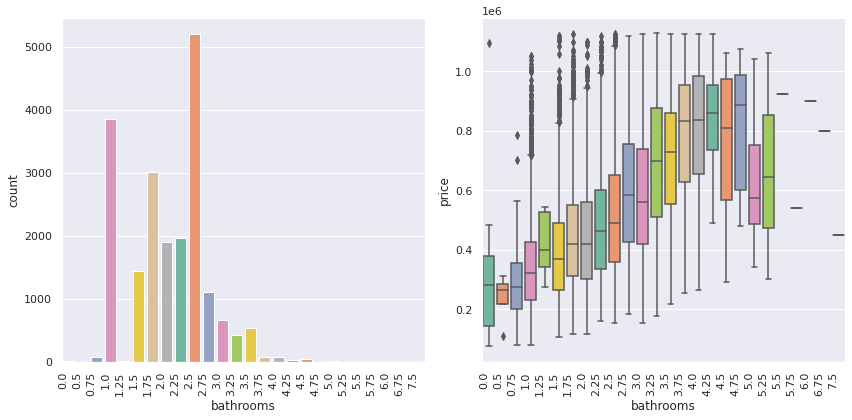

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

chart1 = sns.countplot(x='bathrooms',data=df, palette='Set2',ax=axs[0])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90, horizontalalignment='right')

chart2 = sns.boxplot(y='price',x='bathrooms',data=df, palette='Set2', ax=axs[1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.tight_layout()
plt.show()

Bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower.

Most of the houses have 1 to 4 bathrooms and their prices is also less compared to houess have more than 4 bathrooms. Actually 'bathroom' is highly correlated with 'sqft_living' as per headmap generated above, so I think it area of the house making it expensive not the number of bathrooms.

#### No of floors of property vs property price

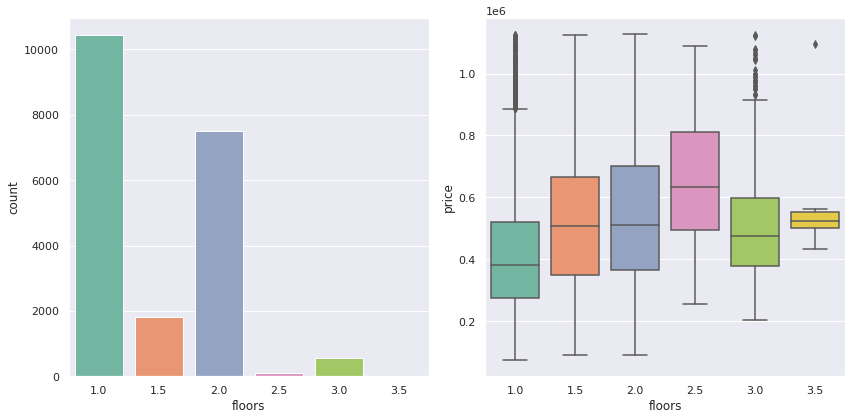

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='floors',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='floors',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

Large number of properies have only ground floor and few properties have penthouse also. However it does not show that high story building are more expensive, may be other factors like total size of property or location is also playing the major role in deciding the price of property.

### Geographical Properties

This dataset contain the features latitude and longitude so it may be interesting to actually explore this by plotting. So let's first see the distribution of prices per latitude vs. longitude.

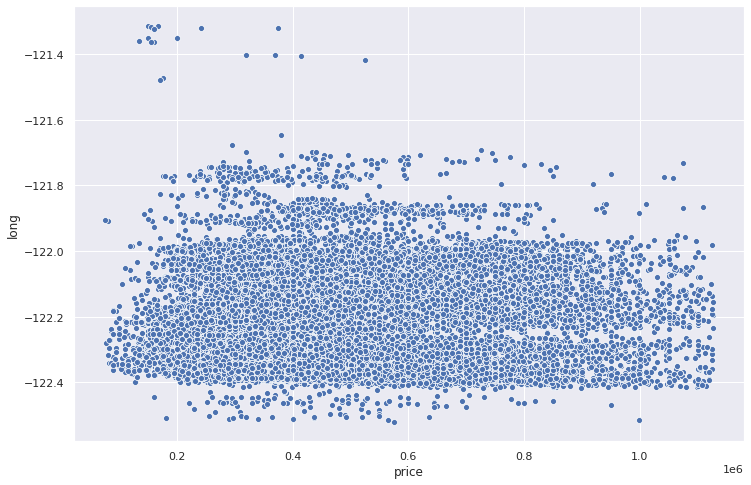

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)
plt.show()

There was no price differentiation based off longitude. But it looks like there tends to be some sort of price distribution at a certain longitude. So looks like at longitude -122 have expensive housing area. We can see the distribution quite clearly.

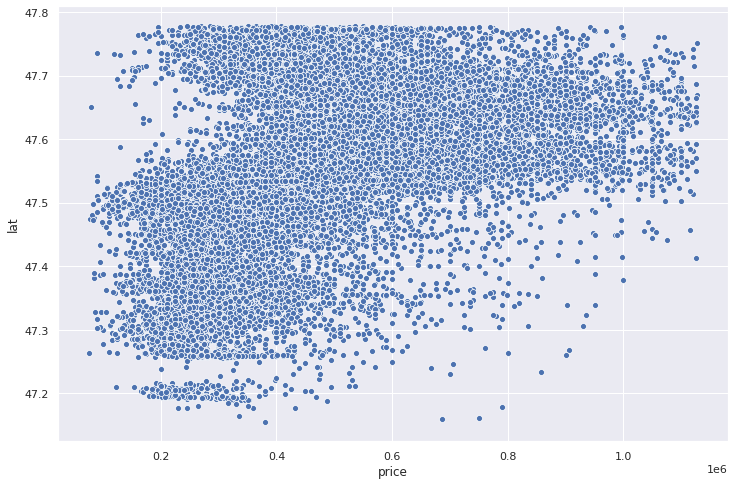

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)
plt.show()

And the same behavior seems for latitude also. It also seems that a particular latitude there's some sort of expensive housing area. And basically what this is telling is that it looks like at a certain combination of latitude and longitude that tends to be an expensive area.
So if we just look at a King County map we can begin to distinguish this.

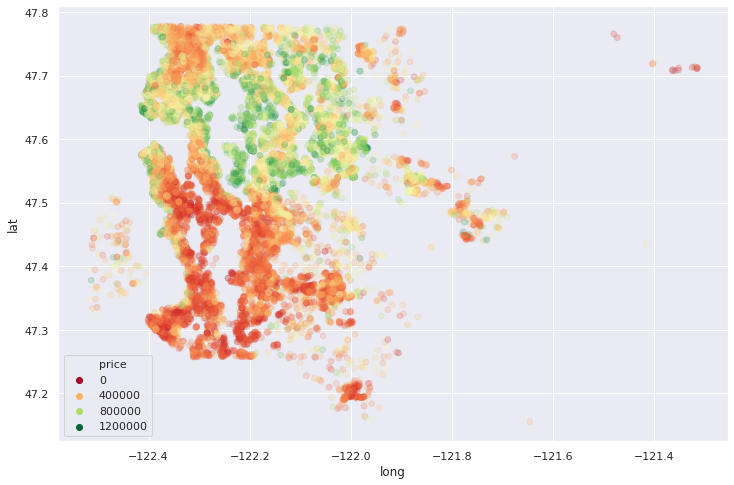

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=df,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)
plt.show()

If we compare above plot to our actual map of King County we can see that more or less they tend to match up.
We can see here kind of the shapes of Seattle and we can see <a href="https://goo.gl/maps/mrsCJavrJ9mywpBC7">here the real map of King County.</a>

Plot show that there are certain expensive housing areas espically between long -122 and lat 47.4.

This graph showing the expensive parts of King County. And also note the expensive houses almost on the edge of the water points which makes sense because usually a waterfront property are going to be more expensive than inland properties.

# **Working with Feature Data**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20467 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20467 non-null  int64  
 1   date           20467 non-null  object 
 2   price          20467 non-null  float64
 3   bedrooms       20467 non-null  int64  
 4   bathrooms      20467 non-null  float64
 5   sqft_living    20467 non-null  int64  
 6   sqft_lot       20467 non-null  int64  
 7   floors         20467 non-null  float64
 8   waterfront     20467 non-null  int64  
 9   view           20467 non-null  int64  
 10  condition      20467 non-null  int64  
 11  grade          20467 non-null  int64  
 12  sqft_above     20467 non-null  int64  
 13  sqft_basement  20467 non-null  int64  
 14  yr_built       20467 non-null  int64  
 15  yr_renovated   20467 non-null  int64  
 16  zipcode        20467 non-null  int64  
 17  lat            20467 non-null  float64
 18  long  

In [34]:
df = df.drop('id',axis=1)

### Feature Engineering from Date

In [35]:
df['date'] = pd.to_datetime(df['date'])

In [36]:
df['month'] = df['date'].apply(lambda date : date.month)

In [37]:
df['year'] = df['date'].apply(lambda date : date.year)

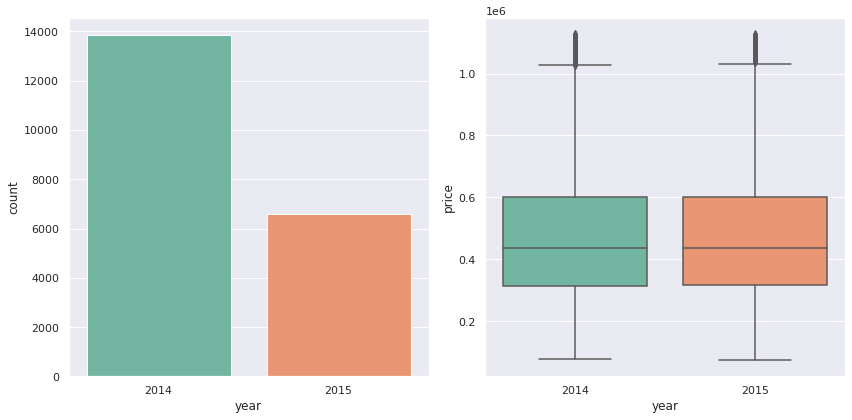

In [38]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='year',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='year',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

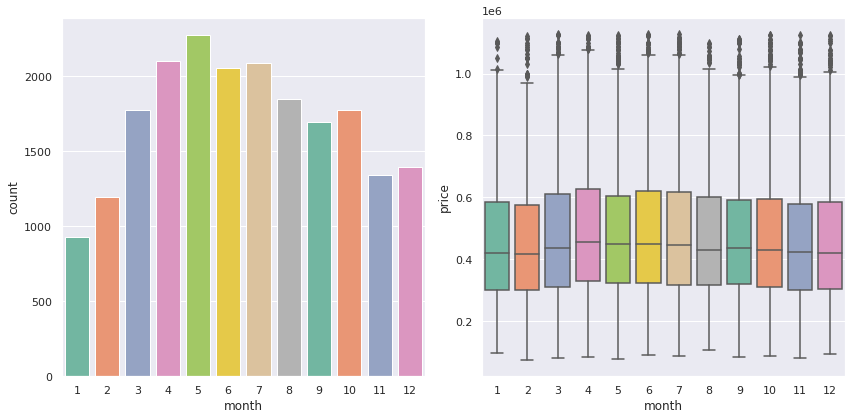

In [39]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='month',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='month',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

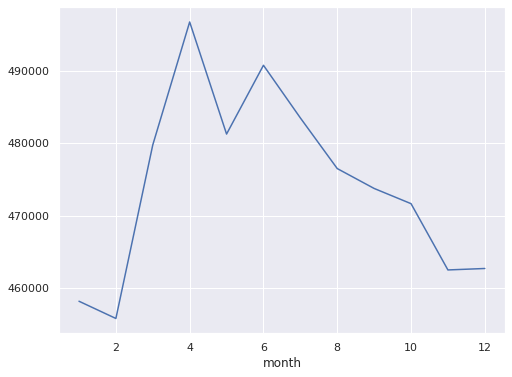

In [40]:
plt.figure(figsize=(8,6))
df.groupby('month').mean()['price'].plot()

**We do not see any significat differences in price with months.**

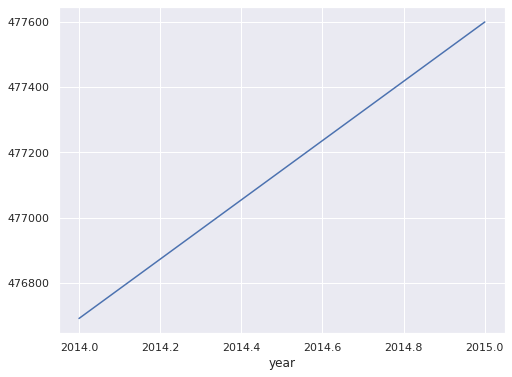

In [41]:
plt.figure(figsize=(8,6))
df.groupby('year').mean()['price'].plot()

**Above plot definitely makes sense because if you look back at King County sales they're just increasing in price as time goes on.**

In [42]:
# Drop the date columns after doing feature engineering.
df = df.drop('date',axis=1)

### Feature Engineering from zipcode

In [43]:
df['zipcode'].value_counts()

98103    590
98038    588
98052    563
98115    558
98042    548
        ... 
98102     89
98109     86
98024     74
98148     57
98039      6
Name: zipcode, Length: 70, dtype: int64

In [44]:
df = df.drop('zipcode',axis=1)

Zipcode is actually categorical feature with 70 unique values, however it look like continues. If we keep zipcode as it is, then model will pretend that zipcode 98103 is greater than 98038, which is not the case. So apply some kind of feature engineering like by creating dummy variable, but it will create 70 more features which is too much for us. So lets do not do any more manual work here and delete this zipcode feature.

### Feature Engineering from Year of Renovation

In [45]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       19701
2014       82
2013       34
2000       30
2007       29
        ...  
1956        1
1948        1
1944        1
1934        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the values of feature 'yr_renovated' is zero, which implies that they are not renovated at all. However zero is actually is not the year and other values are year. So actually it make more sense to categorize into renovated us not-renovated.

In [46]:
df['renovated'] = df['yr_renovated'].apply(lambda yr : 0 if yr==0 else 1)

In [47]:
df['renovated'].value_counts()

0    19701
1      766
Name: renovated, dtype: int64

Now we got clear picture that 19,701 houses are not renovated while only 766 properties are renovated. Below graph shows that renovated properties are expensive.

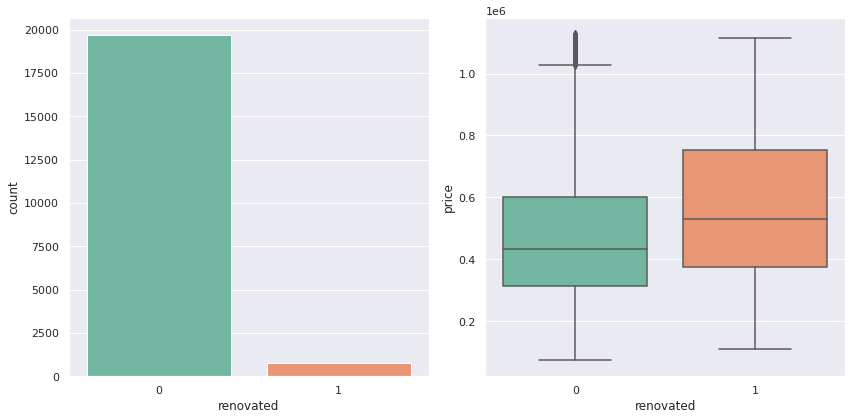

In [48]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='renovated',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='renovated',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

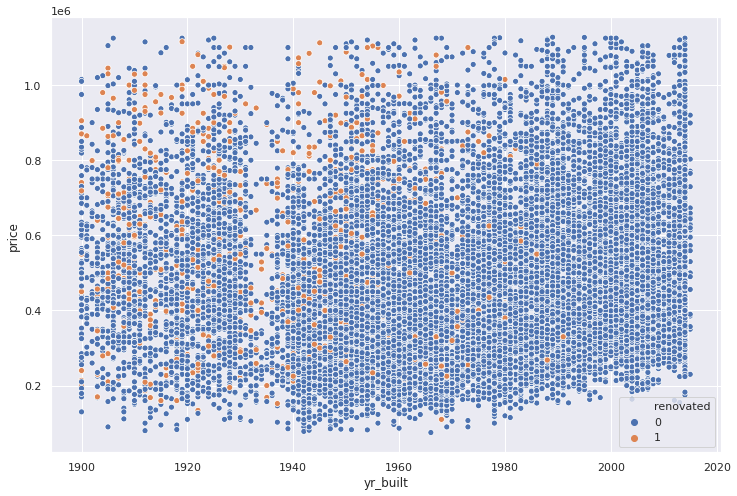

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='yr_built', y='price',hue='renovated' ,data=df)
plt.show()

### Feature Engineering from columns containing year

Actually all the columns containing year are categorical like yr_built and yr_renovated. However, notice that it's most likely that more recent the year of build or renovation essentially the higher the value of that property. So there is a positive correlation of price with yr_built and yr_renovated. So in this case we're actually kind of lucky and due to the scaling from zero to the highest year higher should correlate with more value and we can actually just keep this as is. There is no harm if our model would pretent that years as continues values and 2015 > 2010.

# **Splitting data into Training and Testing samples**

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [50]:
# Separate Target Variable and Predictor Variables
# Also please note that to call the values here because tensor flow may work with numeric array, and it can't work with pandas dataframes.
X = df.drop('price',axis=1).values
y = df['price'].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (14326, 20)
y_train -  (14326,)
X_test -  (6141, 20)
y_test -  (6141,)


# Bringing features onto the same scale

* While using distance based methods like KNN we must attempt to scale the data, so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like salary has range from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.
* In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like Age in years and Sales in Dollars must be brought down to a common scale before feeding it to the ML algorithm
* This will result in a better prediction model.


### Normalization i.e. Min-Max scaling

An alternative approach to Z-score normalization (or standardization) is the so-called **Min-Max scaling** (often also simply called "normalization" - a common cause for confusion!).  
In this approach, the data is scaled to a fixed range - usually 0 to 1.  
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
np.min(X_train)

0.0

In [56]:
np.max(X_train)

1.0

In [57]:
X_train.shape[1]

20

# **Creating a Neural Network Model**

In this section we will create a baseline neural network model for the regression problem. Let’s start off by including all of the functions and objects we will need.

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

We build Sequential model that has two densely connected hidden layer to make it Deep Learning Network with the same number of neurons as input attributes (20). The network uses good practices such as the rectifier activation 'relu' function for the hidden layer. No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transform.

The efficient ADAM optimization algorithm is used and a mean squared error loss function is optimized. This will be the same metric that we will use to evaluate the performance of the model. It is a desirable metric because by taking the square root gives us an error value we can directly understand in the context of the problem (thousands of dollars).

In [59]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

Train the model for 400 epochs, and record the training and validation accuracy in the history object. We also pass the validation data  
so that after each epoch of training on the training data will quickly run the test data and check our loss on the test data, so that way we can keep a tracking of how well performing not just on our training data but also on our test data.

Note that this test data will not actually affect the weights or biases of our network. So Kares isn't going to update the model based on the test data or validation data. Instead it will only use the training data as it's updating the weights and biases and continue to check how well model is doing and not just the training data but also the validation data.

It is a larger data set so we're going to feed in our data in batches and we're gonna call batch size of 128. It's very typical to do batch sizes in powers of two so 64, 128, 256.  The smaller the batch size, the longer training is going to take but the less likely we're going to overfit to data because we're not passing in the entire training set at once.

In [60]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
112/112 [==============================] - 0s 4ms/step - loss: 272916643840.0000 - val_loss: 266235559936.0000
Epoch 2/400
112/112 [==============================] - 0s 2ms/step - loss: 272235528192.0000 - val_loss: 263911555072.0000
Epoch 3/400
112/112 [==============================] - 0s 2ms/step - loss: 262834749440.0000 - val_loss: 242517622784.0000
Epoch 4/400
112/112 [==============================] - 0s 2ms/step - loss: 215528603648.0000 - val_loss: 164549705728.0000
Epoch 5/400
112/112 [==============================] - 0s 2ms/step - loss: 111679668224.0000 - val_loss: 56012029952.0000
Epoch 6/400
112/112 [==============================] - 0s 2ms/step - loss: 37998018560.0000 - val_loss: 28624218112.0000
Epoch 7/400
112/112 [==============================] - 0s 2ms/step - loss: 29356734464.0000 - val_loss: 28171595776.0000
Epoch 8/400
112/112 [==============================] - 0s 2ms/step - loss: 29009944576.0000 - val_loss: 27881000960.0000
Epoch 9/400
112/112 [==

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  420       
_________________________________________________________________
dense_1 (Dense)              multiple                  420       
_________________________________________________________________
dense_2 (Dense)              multiple                  420       
_________________________________________________________________
dense_3 (Dense)              multiple                  420       
_________________________________________________________________
dense_4 (Dense)              multiple                  21        
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [62]:
losses = pd.DataFrame(model.history.history)

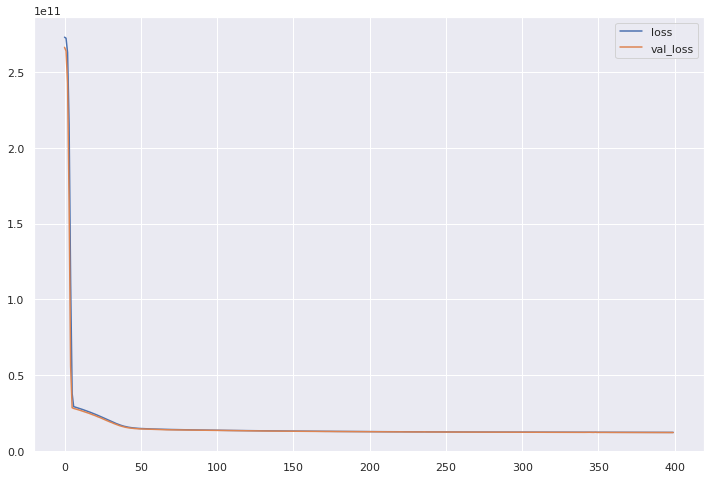

In [63]:
losses.plot(figsize=(12,8))

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [64]:
from sklearn import metrics

def measure_accuracy(original, predicted, train=True):  
    mae = metrics.mean_absolute_error(original, predicted)
    mse = metrics.mean_squared_error(original, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(original, predicted))
    #rmsle = np.sqrt(metrics.mean_squared_log_error(original, predicted))
    r2_square = metrics.r2_score(original, predicted)
    evs = metrics.explained_variance_score(original,predicted)
    
    if train:
        print("Training Result : ")
        print('------------------')
        print('MAE: {0:0.3f}'.format(mae))
        print('MSE: {0:0.3f}'.format(mse))
        print('RMSE: {0:0.3f}'.format(rmse))
        #print('RMSLE: {0:0.3f}'.format(rmsle))
        print('Explained Variance Score: {0:0.3f}'.format(evs))
        print('R2 Square: {0:0.3f}'.format(r2_square))
        print('\n')
    elif not train:
        print("Testing Result : ")
        print('------------------')
        print('MAE: {0:0.3f}'.format(mae))
        print('MSE: {0:0.3f}'.format(mse))
        print('RMSE: {0:0.3f}'.format(rmse))
        #print('RMSLE: {0:0.3f}'.format(rmsle))
        print('Explained Variance Score: {0:0.3f}'.format(evs))
        print('R2 Square: {0:0.3f}'.format(r2_square))

### Predicting on Brand New Data

In [65]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

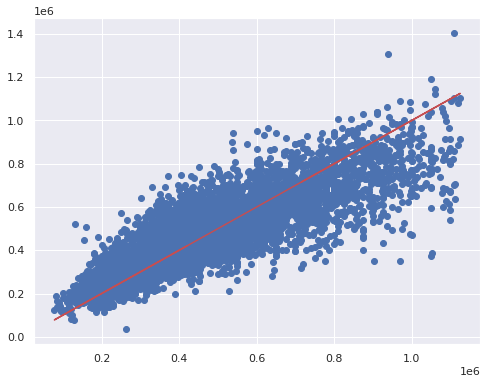

In [66]:
plt.figure(figsize=(8,6))
# Our predictions
plt.scatter(y_test,y_test_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [67]:
errors = y_test.reshape(6141, 1) - y_test_pred

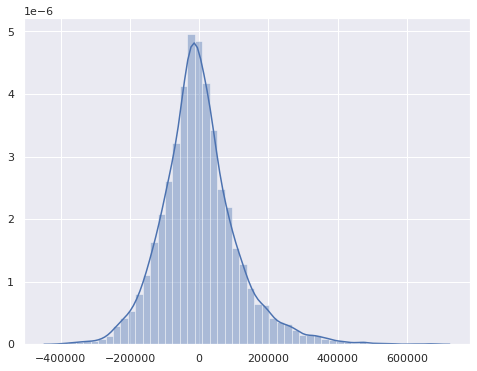

In [68]:
plt.figure(figsize=(8,6))
sns.distplot(errors)

In [69]:
measure_accuracy(y_train, y_train_pred, train=True)
measure_accuracy(y_test, y_test_pred, train=False)

Training Result : 
------------------
MAE: 82182.250
MSE: 12335224620.419
RMSE: 111064.056
Explained Variance Score: 0.719
R2 Square: 0.719


Testing Result : 
------------------
MAE: 81183.134
MSE: 12270425629.856
RMSE: 110771.953
Explained Variance Score: 0.709
R2 Square: 0.709


# **Comparing with LinearRegression**

In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

measure_accuracy(y_train, y_train_pred, train=True)
measure_accuracy(y_test, y_test_pred, train=False)

Training Result : 
------------------
MAE: 86721.594
MSE: 13110933882.757
RMSE: 114502.986
Explained Variance Score: 0.702
R2 Square: 0.702


Testing Result : 
------------------
MAE: 86033.312
MSE: 13060613294.779
RMSE: 114283.040
Explained Variance Score: 0.690
R2 Square: 0.690
